In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Unigram_Combine NEW sent pol.csv',header=None,names=["sentiment","text","polarity","repetations"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
#descriptions
print(messages.describe())

           polarity   repetations
count  17780.000000  17780.000000
mean       0.000753      5.261361
std        0.087847     51.168333
min       -1.000000      1.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      3.000000
max        1.000000   5968.000000


In [3]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative      302
neutral     17146
positive      332
dtype: int64


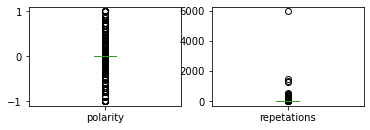

In [4]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [5]:
messages['text'][5]

'amp'

In [6]:
lst=[]
corpus = []
for i in range(0,len(messages['text'])):
    str1=str(messages['text'][i])
    str1=str1.lower()
    lst=str1.split()
    lst= [lemmatizer.lemmatize(word) for word in lst if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    lst=[e for e in lst if e not in non_word]

    corpus.append(lst)
        

In [7]:
X=corpus
len(X)

17780

In [8]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)

In [9]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [10]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets

In [12]:
from numpy import absolute
X =absolute( StandardScaler().fit_transform(Y))
print(X)

X_sparse = csr_matrix(X)
print(X_sparse)


[[0.00749974 0.01060654 0.01060654 ... 0.01060654 0.01060654 0.01060654]
 [0.00749974 0.01060654 0.01060654 ... 0.01060654 0.01060654 0.01060654]
 [0.00749974 0.01060654 0.01060654 ... 0.01060654 0.01060654 0.01060654]
 ...
 [0.00749974 0.01060654 0.01060654 ... 0.01060654 0.01060654 0.01060654]
 [0.00749974 0.01060654 0.01060654 ... 0.01060654 0.01060654 0.01060654]
 [0.00749974 0.01060654 0.01060654 ... 0.01060654 0.01060654 0.01060654]]
  (0, 0)	0.007499742200792585
  (0, 1)	0.010606535427157641
  (0, 2)	0.010606535427157128
  (0, 3)	0.010606535427158366
  (0, 4)	0.010606535427156895
  (0, 5)	0.010606535427156834
  (0, 6)	0.010606535427156765
  (0, 7)	0.01060653542715711
  (0, 8)	0.010606535427156899
  (0, 9)	0.010606535427157275
  (0, 10)	0.01060653542715709
  (0, 11)	0.010606535427156998
  (0, 12)	0.010606535427156897
  (0, 13)	0.010606535427156907
  (0, 14)	0.010606535427157034
  (0, 15)	0.010606535427157775
  (0, 16)	0.010606535427158491
  (0, 17)	0.010606535427157253
  (0, 18)	

In [13]:
from numpy import absolute
tsvd = TruncatedSVD(n_components=10)

X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)

Z=absolute(X_sparse_tsvd)
print(Z.shape)
print(); print(Z)

(17780, 10)

[[4.20549223e-01 9.05470256e-08 1.59819736e-06 ... 1.39377425e-07
  1.63085987e-06 5.27701707e-07]
 [2.51671420e+00 1.52930694e+00 3.93623011e-01 ... 7.77539016e-01
  1.83084864e+00 1.21834398e+00]
 [4.20549223e-01 9.05470256e-08 1.59819736e-06 ... 1.39377425e-07
  1.63085987e-06 5.27701707e-07]
 ...
 [4.20549223e-01 9.05470256e-08 1.59819736e-06 ... 1.39377425e-07
  1.63085987e-06 5.27701707e-07]
 [4.20549223e-01 9.05470256e-08 1.59819736e-06 ... 1.39377425e-07
  1.63085987e-06 5.27701707e-07]
 [2.37124889e+00 3.21829599e-01 1.75203889e-01 ... 9.30699266e-01
  1.41653676e-01 1.40733240e+00]]


In [14]:
w=messages['sentiment']
w

0         neutral
1         neutral
2         neutral
3        positive
4         neutral
           ...   
17775     neutral
17776     neutral
17777     neutral
17778     neutral
17779     neutral
Name: sentiment, Length: 17780, dtype: object

In [15]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(Z, w, test_size=0.20, random_state=1)

In [16]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
 #Spot Check Algorithms
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy
import time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("score",score1)


LR: 0.963864 (0.000332) time taken (1.697397)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
LDA: 0.963864 (0.000332) time taken (1.106414)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
KNN: 0.963864 (0.000332) time taken (13.104377)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
CART: 0.956271 (0.003074) time taken (1.359301)
score (0.9597862767154106, 0.9597862767154106, 0.9597862767154106, None)
NB: 0.888248 (0.222303) time taken (0.476752)
score (0.9656917885264342, 0.9656917885264342, 0.9656917885264342, None)
SVM: 0.963864 (0.000332) time taken (20.278898)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [20]:
# Spot Check Algorithms
models = []

models.append(('MultiNB', MultinomialNB()))
models.append(('BerNB', BernoulliNB()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearSVC', LinearSVC(max_iter=5000)))
models.append(('Adab', AdaBoostClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PassiveAC', PassiveAggressiveClassifier()))
models.append(('Perceptron',  Perceptron()))
models.append(('RFT', RandomForestClassifier()))
models.append(('MLP', MLPClassifier(max_iter=1000)))
# evaluate each model in turn
results = []
names = []
accuracy=[]
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("score",score1)
   

MultiNB: 0.963864 (0.000332) time taken (0.741697)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
BerNB: 0.963864 (0.000332) time taken (0.823938)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
LR: 0.963864 (0.000332) time taken (1.606296)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
LinearSVC: 0.963864 (0.000332) time taken (571.711854)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
Adab: 0.962317 (0.002722) time taken (26.824840)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
Ridge: 0.963864 (0.000332) time taken (0.985198)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
PassiveAC: 0.962598 (0.003721) time taken (0.977925)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
Perceptron: 0.891220 (0.217842) time taken (0.923279)
score (0.9662542182227222, 0.9662542182227222, 0.9662542182227222, None)
RFT: 0.961